In [5]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
downloaded = drive.CreateFile({'id':'16WS2op3fbJrorCHrbnhsmZhNoeTG0HKM'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data.csv')

In [20]:
import pandas as pd
df = pd.read_csv('data.csv') 
print(df.head(50))

    X1   X2  Y
0   36   50  1
1   94   53  0
2   14   67  1
3    5   67  1
4    3   87  1
5   82   20  0
6   24   11  0
7   57   55  0
8   49   30  0
9   50   56  1
10  35   73  1
11  52   40  0
12   5   81  1
13  52   57  1
14  61   24  0
15  70   80  1
16  45   94  1
17  45   13  0
18  65   50  0
19  90   27  0
20  78   51  0
21  88   28  0
22  52   42  0
23  91   87  0
24  35   11  0
25  45   80  1
26  34   41  1
27   8    6  0
28  89   62  0
29  83   82  0
30  19   90  1
31   3   35  1
32  37   51  1
33  66   13  0
34  43   57  1
35  26   53  1
36  19  100  1
37  58   33  0
38  73   63  0
39  30   49  1
40  49   72  1
41  62   43  0
42  40   54  1
43  30    1  0
44  13   53  1
45  69   57  0
46  49    6  0
47  25   61  1
48  64   81  1


In [21]:
import random
import matplotlib.pyplot as plt
X1 = []
X2 = []
Y = []

X1=df['X1'].values.tolist()
X2=df['X2'].values.tolist()
Y=df['Y'].values.tolist()
print(X1)
print(X2)
print(Y)

[36, 94, 14, 5, 3, 82, 24, 57, 49, 50, 35, 52, 5, 52, 61, 70, 45, 45, 65, 90, 78, 88, 52, 91, 35, 45, 34, 8, 89, 83, 19, 3, 37, 66, 43, 26, 19, 58, 73, 30, 49, 62, 40, 30, 13, 69, 49, 25, 64]
[50, 53, 67, 67, 87, 20, 11, 55, 30, 56, 73, 40, 81, 57, 24, 80, 94, 13, 50, 27, 51, 28, 42, 87, 11, 80, 41, 6, 62, 82, 90, 35, 51, 13, 57, 53, 100, 33, 63, 49, 72, 43, 54, 1, 53, 57, 6, 61, 81]
[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]


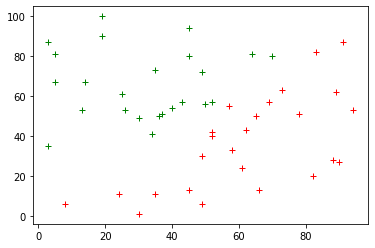

In [22]:
import matplotlib.pyplot as plt
import math
import random
from IPython import display
from scipy.signal import savgol_filter
plt.figure()
for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i], "r+")
    else:
        plt.plot(X1[i],X2[i],"g+")
plt.show()

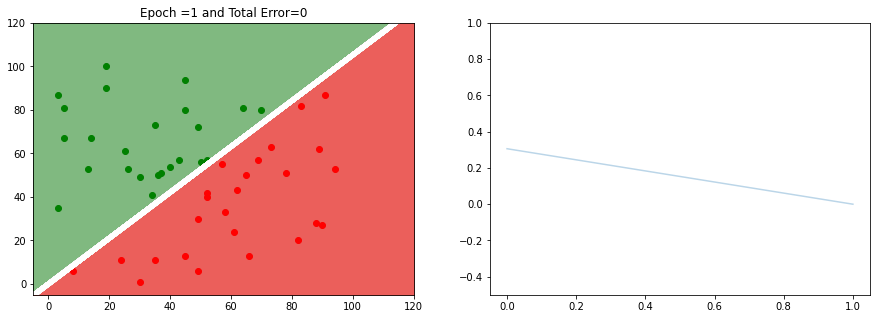

Epoch: 1 Loss: 0.0 and y=[-5.279917020034151, 126.3724318605334] and x=0.013124589998760794


In [23]:
W=[random.random(), random.random()]
b=random.random()
lr=0.5

theta=0.5
epoch=0
count=0
loss=[]
while count < len(X1):
    total_error=0
    for i in range(len(X1)):
        ws=W[0]*X1[i]+W[1]*X2[i]+b
        pred=0
        if ws > theta:
            pred=1
        
        error = Y[i]-pred
        if error!=0:
            count=0
            total_error+=math.sqrt(error**2)
            W[0]+=lr*error*X1[i]
            W[1]+=lr*error*X2[i]
            b+=lr*error
        else:
            count+=1
    loss.append(1/len(X1)*total_error)
    plt.figure(figsize=(15,5))
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    for i in range(len(Y)):
        if Y[i]==0:
            plt.plot(X1[i],X2[i], "ro")
        else:
            plt.plot(X1[i],X2[i],"go")
        plt.xlim(-5,120)
        plt.ylim(-5,120)
        xint=(theta-b)/W[0]
        yint=(theta-b)/W[1]
        slope=-yint/xint
        x=plt.xlim()
        y=[]
        for i in x:
            y.append(slope*i+yint)
        plt.plot(x,y, 'w-',linewidth=5)
        plt.fill_between(x=[-5,120],y1=-5,y2=120, color='g',alpha=.01)
        plt.fill_between(x=[-5,120],y1=-5,y2=y, color='#F05F5F',alpha=.4)
        #plt.fill_between(x=[-5,120],y1=y,y2=-5, color='g')
        
    plt.title(f"Epoch ={epoch} and Total Error={total_error}")
    plt.subplot(1,2,2)
    plt.ylim([-.5,1])
    plt.plot(loss, alpha=0.3)
    if epoch > 10:
        avg = savgol_filter(loss, 11, 3) # window size 51, polynomial order 3
        plt.plot(avg, 'r--', lw=3)
    
    plt.show()
    print(f"Epoch: {epoch} Loss: {loss[-1]} and y={y} and x={xint}")
    epoch+=1
